# Logistic Regression

In the initial stage of training, we will construct a logistic regression model to predict whether a student will be accepted to a university. Imagine that you are the administrator of the relevant part of the university and want to use the scores of the students who applied for the two tests to decide whether they will be accepted or not. Now you have a training sample set of previous applicants that can be used to train a logistic regression. For each training sample, you have their scores on both tests and the final result of being accepted. To accomplish this prediction task, we are going to build a classification model that can assess the likelihood of acceptance based on the scores of the two tests.

reference:
1. https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes/blob/master/code/ex2-logistic%20regression/ML-Exercise2.ipynb
2. https://www.cnblogs.com/ssyfj/p/13258168.html#%E4%B8%80%EF%BC%9A%E5%8A%A0%E8%BD%BD%E6%95%B0%E6%8D%AE%E5%92%8C%E5%AE%9E%E7%8E%B0sigmoid%E5%87%BD%E6%95%B0%E5%90%8C%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D
3. https://www.cnblogs.com/ssyfj/p/12799137.html#%E5%9B%9B%E4%BB%A3%E7%A0%81%E5%AE%9E%E7%8E%B0cost

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


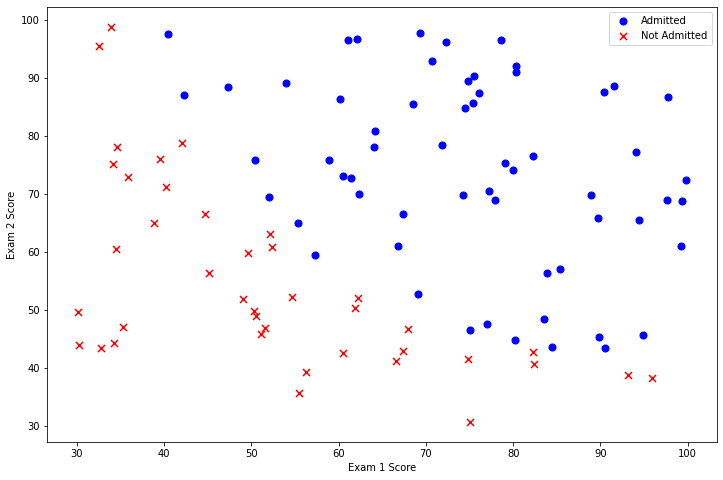

In [42]:
positive = data[data['Admitted'].isin([1])] #Pandas isin()方法用于过滤数据帧。isin() 方法有助于选择在特定列中具有特定(或多个)值的行。
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend() #ax.legend()作用：在图上标明一个图例，用于说明每条曲线的文字显示,plot.legend(loc=2) , 这个位置就是4象项中的第二象项，也就是左上角
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 1.sigmoid function

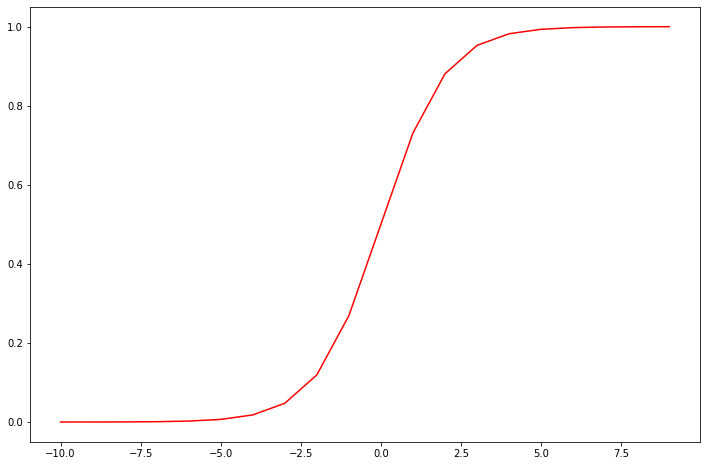

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

# gradient descent

### a.the problem of original cost function using gradient descent:

original cost function:
具体来说，我要定义用来拟合参数的优化目标或者叫代价函数，这便是监督学习问题中的逻辑回归模型的拟合问题。
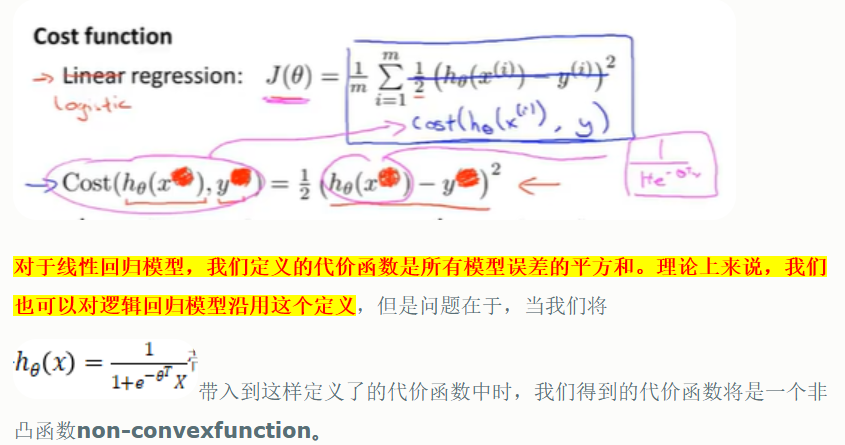

we can see that the the inserting of h_theta(x) causes the cost function a non-convexfunction.This means that our cost function has many local minima, which will affect the gradient descent algorithm's ability to find global minima. Accordingly, we want our cost function J(θ) to be a convex function as follows
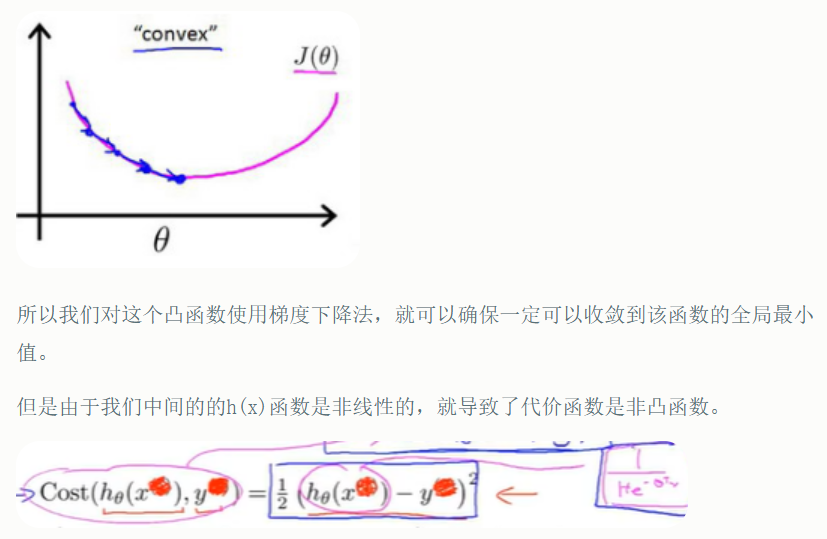


### b.modified cost function

h(x)的取值范围在(0,1)之间

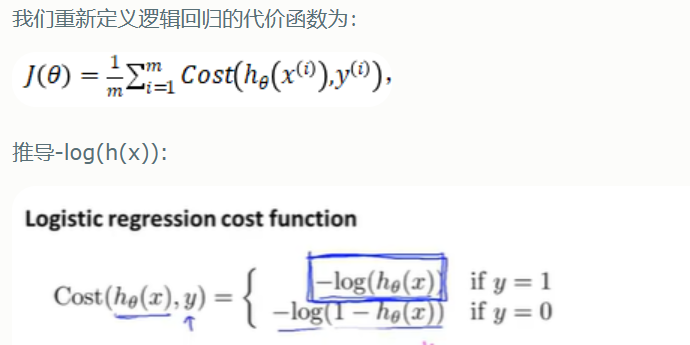

则h(x)和cost(h(x),y)之间的关系如下图所示：

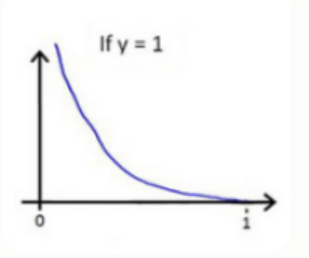

当预测值是h(x)=1,实际标签值y也是为1，那么cost代价值则为0。
但是当预测值是0，实际标签值是1，那么cost代价值是∞大，这就说明我们的预测是错误的，那么我们就用非常非常大的代价值来惩罚这个学习算法。

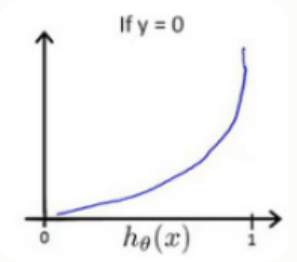

是y=0的情况下，cost代价值（纵轴）和h(x)预测值（横轴）之间的关系。
当预测值是h(x)=0,实际标签值y也是为0，那么cost代价值则为0。
但是当预测值是1，实际标签值是0，那么cost代价值是∞大，这就说明我们的预测是错误的，那么我们就用非常非常大的代价值来惩罚这个学习算法

### c.Cost function merge, simplified
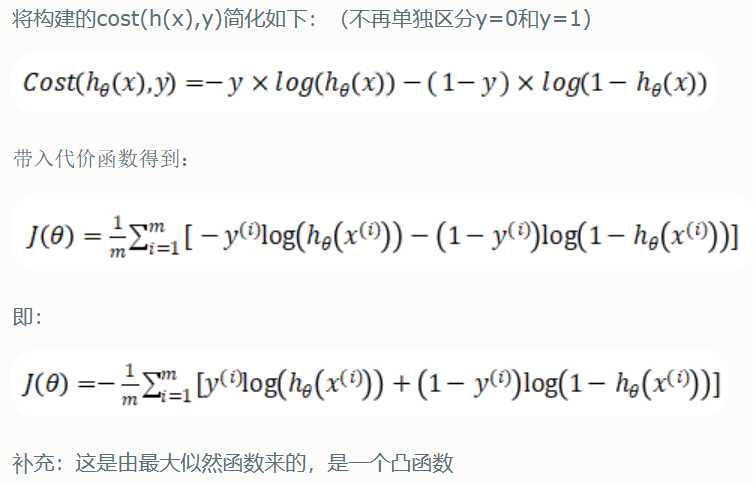

### d.code(modified cost function)

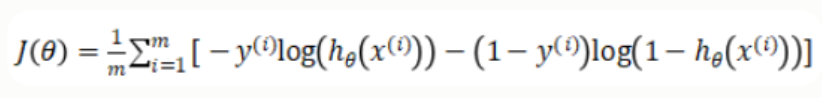
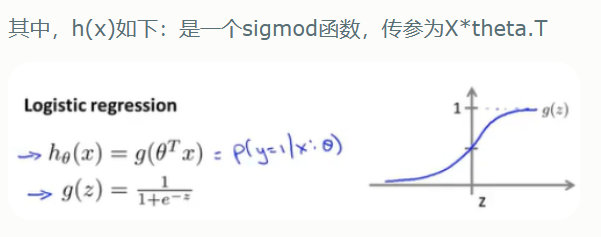

In [44]:
import numpy as np
def cost(theta, X, y):
  theta = np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  first = np.multiply(-y, np.log(sigmoid(X* theta.T)))
  second = np.multiply((1 - y), np.log(1 - sigmoid(X* theta.T)))
  return np.sum(first - second) / (len(X))

### e. Gradient descent method - fitting out the parameters θ for the training set

Core idea: change theta so that J(θ) is minimized, i.e., the term for which the partial derivative of θ is 0

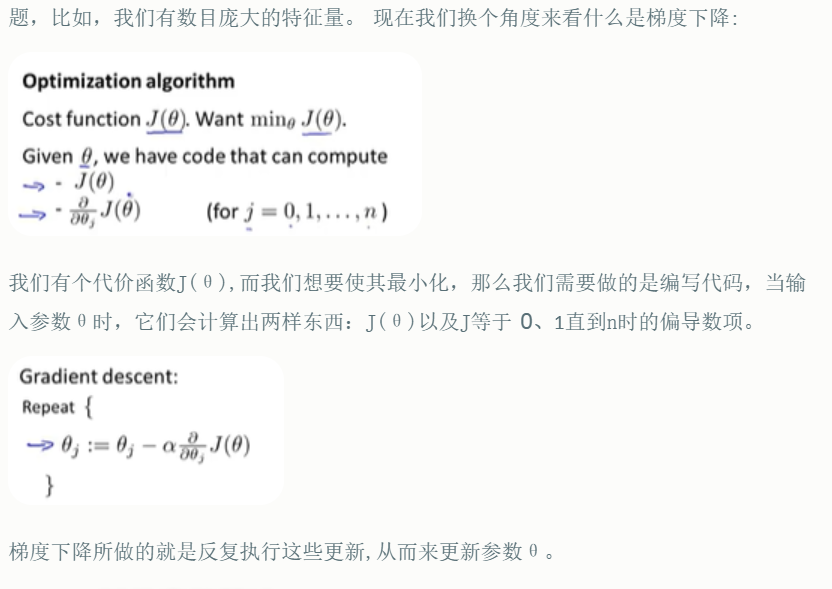

In [45]:
# add a ones column - there is theta_0 in the gradient descent,whcih multiply 1 will remain unchanged.
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3) # https://blog.csdn.net/hj1577794431/article/details/98734100

### gradient descent + scipy_fminunc
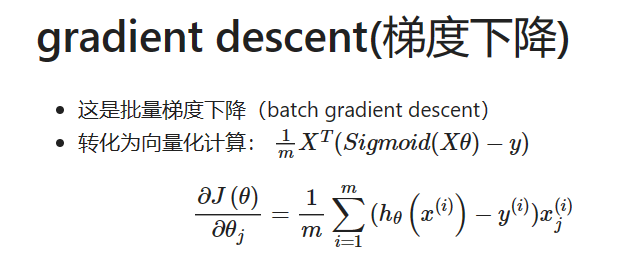

In [46]:
# gradient descent + scipy_fminunc
# 注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。
# 在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。
# 由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [47]:
#用我们的数据和初始参数为0的梯度下降法的结果
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [48]:
#用SciPy's truncated newton（TNC）实现寻找最优参数
# https://www.cnblogs.com/tongtong123/p/10634716.html
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [49]:
#代价函数计算结果
cost(result[0], X, y)

0.20349770158947458

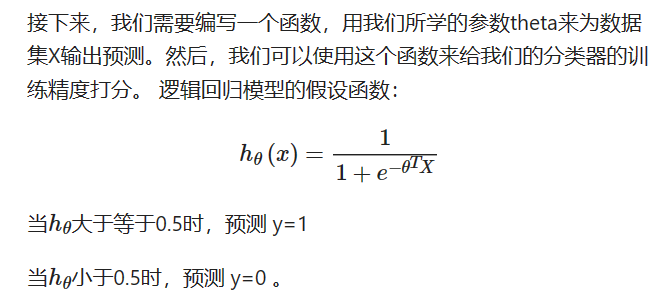

In [50]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


# Gradient Ascent

In [51]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('ex2data1.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #转化成矩阵
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m,n = np.shape(dataMatrix)			#获取矩阵属性，m行n列
    alpha = 0.001	#init alpha
    maxCycles = 500	#define the recycle times
    weights = np.ones((n,1))		#initialize the 回归系数，为n行一列单位向量
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #用初始值回归系数乘以数据，可以看到
		#这边是整个数据集乘以回归系数，矩阵相乘： m*n 乘以 n*1，得到m行一列的单位向量,
		#也就是得到预测值h(x).
        error = (labelMat - h)              #误差值，相当于(y - h(x))。
        weights = weights + alpha * dataMatrix.transpose()* error #更新回归系数，代码中
		#对应上述式子：θj := θj + α (y(i) − hθ(x(i))) * xj( i).其中error为(y(i) − hθ(x(i)))
		#dataMatrix为输入数据集x。transpose为矩阵转置，dataMatrix转置之后为n*m 与 m*1的error可以相乘
    return weights

gradAscent(X,y)

C:\Users\马嘉文\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


matrix([[ 0.9       ,  0.9       ,  0.9       ,  1.        ,  1.        ,
          0.9       ,  1.        ,  1.        ,  1.        ,  1.        ,
          0.9       ,  0.9       ,  1.        ,  1.        ,  0.9       ,
          1.        ,  1.        ,  0.9       ,  1.        ,  1.        ,
          0.9       ,  1.        ,  0.9       ,  0.9       ,  1.        ,
          1.        ,  1.        ,  0.9       ,  0.9       ,  0.9       ,
          1.        ,  1.        ,  0.9       ,  1.        ,  0.9       ,
          0.9       ,  0.9       ,  1.        ,  0.9       ,  0.9       ,
          1.        ,  0.9       ,  1.        ,  0.9       ,  0.9       ,
          0.9       ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  0.9       ,  0.9       ,
          0.9       ,  1.        ,  0.9       ,  1.        ,  1.        ,
          1.        ,  0.9       ,  0.9       ,  0.9       ,  0.9       ,
          0.9       ,  1.        ,  0.

In [52]:
path = 'ex2data1.txt'
data2 = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)

def gradientAsc(data_X,data_Y,iter_Count,alpha): #使用梯度上升，不需要求解代价函数，利用的是概率---我们想求概率最大值    及误差最小   这里就体现了我们之前提及的sigmoid不只是表示0/1,还是一个表示概率的函数
    m,n = data_X.shape
    W = np.ones((n,1))  #初始化权重矩阵    这里直接是n行1列

    for i in range(iter_Count): #进行迭代
        yPred = sigmoid(data_X@W)#开始计算sigmoid值---即预测值
        error = data_Y - yPred  #获取实际标签值和预测值的误差
        W += alpha*data_X.T@error  #其中梯度上升---我们这里的W一直在上升，注意：yPred由于来自sigmoid函数，所以会一直<=1,所以error不会为负值，可能最后拟合出error正好为全0的结果，就是我们要的结果

    return W

print(gradientAsc(X2,y,500,0.001))

def predict(theta, X):
    probability = sigmoid(np.dot(X,theta))
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = [[-2.81281594],[5.75151509],[1.084026]]
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

[[-2.81281594]
 [ 5.75151509]
 [ 1.084026  ]]
accuracy = 60%


### we cannot draw the 2-dimension graph of this problem case, the true and false are 2-dimension however the h_theta is 3-dimension,so we use accuracy to test the model

In [53]:
'''def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat = X2
    labelMa = y2
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMa[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

weights = gradientAsc(X2,y,500,0.001)
plotBestFit(weights)'''

"def plotBestFit(weights):\n    import matplotlib.pyplot as plt\n    dataMat = X2\n    labelMa = y2\n    dataArr = np.array(dataMat)\n    n = np.shape(dataArr)[0] \n    xcord1 = []; ycord1 = []\n    xcord2 = []; ycord2 = []\n    for i in range(n):\n        if int(labelMa[i])== 1:\n            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])\n        else:\n            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])\n    fig = plt.figure()\n    ax = fig.add_subplot(111)\n    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')\n    ax.scatter(xcord2, ycord2, s=30, c='green')\n    x = np.arange(-3.0, 3.0, 0.1)\n    y = (-weights[0]-weights[1]*x)/weights[2]\n    ax.plot(x, y)\n    plt.xlabel('X1'); plt.ylabel('X2');\n    plt.show()\n\nweights = gradientAsc(X2,y,500,0.001)\nplotBestFit(weights)"

ValueError: shapes (100,) and (3,1) not aligned: 100 (dim 0) != 3 (dim 0)

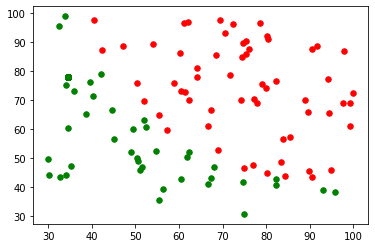

In [54]:
#绘图图像，画出决策边界
'''X3 = data2.iloc[:,0:cols-1]
X3 = np.array(X3.values)'''
plt.figure()
plt.scatter(X2[np.where(y2==1),1],X2[np.where(y2==1),2],c="red",s=30)
plt.scatter(X2[np.where(y2==0),1],X2[np.where(y2==0),2],c="green",s=30)

#绘制决策边界直线
x = np.linspace(-3,3,100)
W = gradientAsc(X2,y2,500,0.001)
y = np.dot(x,W)
plt.plot(x,y)
plt.show()

### improved gradient ascent
我们直接来看又一次改进后的算法：

1.之前我们的alpha是保持不变的，这边每次迭代的时候都会适当调整alpha，调整的思想：alpha还是有一个最基本的值比如0.01，在此基础上加上一个单调递减的式子（4/(1+i+j)）,j是迭代次数， 为什么选择4了，我是这么理解的：

i是数据下标，例子中例子中为0-300，蛮算为300，j是迭代次数可能值不确定但肯定不会太小，这样就是1+i+j > 300 ,这样的话 3/(1+i+j)  < 0.01,把其中的3改为4，那这个式子就比0.01大了，最终可以理解为alpha加上一个以alpha为最大值单调递减的式子，这样子的行为为了保证常数alpha的值对数据还是有一定的影响。不然的话你想要是以0.5,0.08这样的最值单调减，可能就会使0.01失去意义。以上只是个人见解，最终还是要以实际数据为主，选择合适的式子、参数来确定。这个式子可能不会严格递减当j<< max(i)。使alpha随着迭代次数不断减小，但永远不会减到0，最小就是初始值0.01。

2.通过随机获取样本来更新回归系数，更新之后再删除此样本，然后在进行下一次迭代这种方法也是遍历了所有的数据集，只是遍历的顺序是随机的，可以减少周期性波动，你想有时候可能一连串的数据波动很大，随机获取就可以减免这种情况，当然也会有随机到不好的时候

In [ ]:
import random
def sigmoid2(Z):
    if Z >= 0:
        return 1/(1+np.exp(-Z)) #-Z可能会是极大值，所以导致np.exp(-Z)过大，导致溢出。所以由下面分支处理
    else:   #若是Z<0,那么会出现结果为0。我们只是将上面的式子展开来了。这样，不会出现np.exp(-Z)过大溢出
        return np.exp(Z) / (1+np.exp(Z))

def stocGradientAsc2(data_X,data_Y,iter_Count,alpha):
    m,n = data_X.shape
    W2 = np.ones((n,1))

    for j in range(iter_Count): #迭代次数和批量随机梯度保持一致
        dataInt = list(range(m))  #获取全部索引0 - m-1  列表
        for i in range(m):  #迭代数据和批量保持一致
            new_alpha = 4/(1+j+i)+alpha #适当调整alpha参数，随着迭代次数上升，适当降低alpha的值。防止后面的波动。并且避免参数严格下降
            randIdx = int(random.uniform(0,len(dataInt)))   #uniform随机选取范围内的一个实数，所以要int
            h = sigmoid2(data_X[randIdx]@W)
            error = data_Y[randIdx] - h
            W2 += new_alpha*error*np.array([data_X[randIdx]]).T
            del(dataInt[randIdx])
    return W2

W2 = stocGradientAsc2(X2,y,150,0.01)
print(W2)

theta_min2 = [[-372.27956751],[-18922.16615589],[-20823.78562727]]
predictions = predict(theta_min2, X2)
'''correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))'''
print ('accuracy = {0}%'.format(accuracy))

[[  -387.96205502]
 [-19767.38815322]
 [-21814.02940268]]
accuracy = 60%


C:\Users\马嘉文\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


# Regularized logistic regression
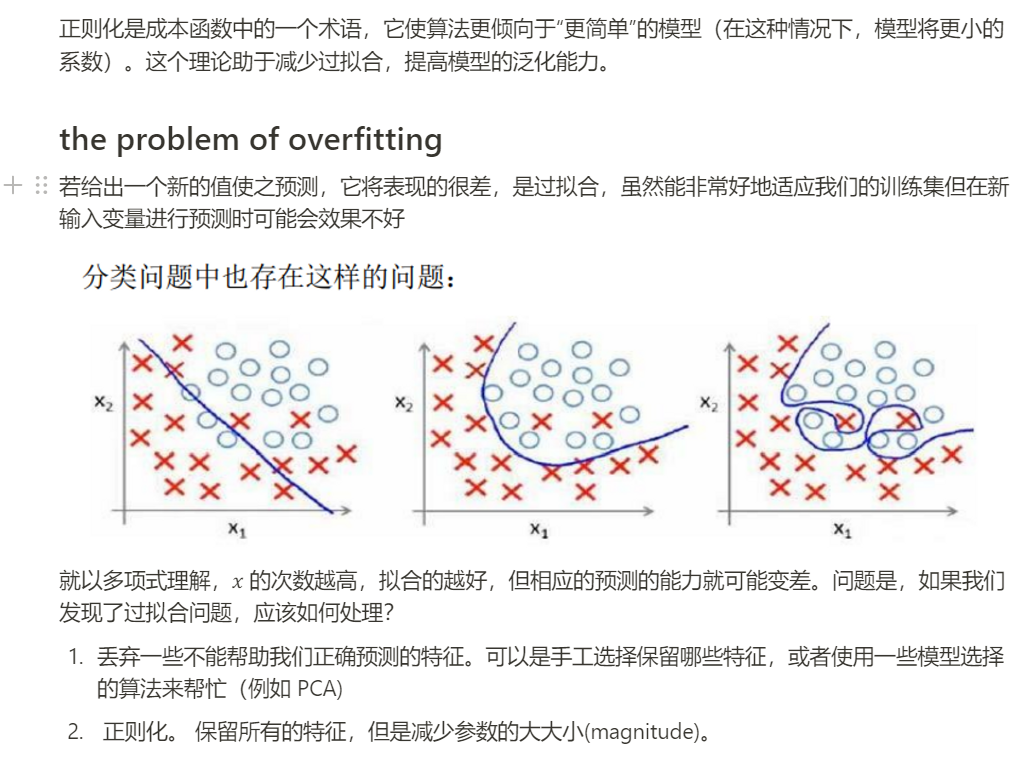

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex2data2.txt'
ex2data2 = pd.read_csv(path, header = None,names = ['Test 1','Test 2','Accepted'] )
ex2data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


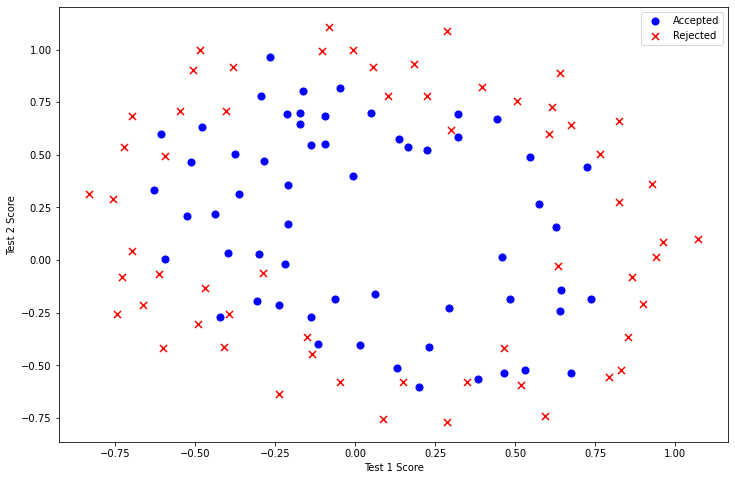

In [56]:
positive = ex2data2[ex2data2['Accepted'].isin([1])]
negative = ex2data2[ex2data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

## 1.feature mapping

In [57]:
degree = 5
x1 = ex2data2['Test 1']
x2 = ex2data2['Test 2']

ex2data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        ex2data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

ex2data2.drop('Test 1', axis=1, inplace=True) # https://blog.csdn.net/W_weiying/article/details/84626260
ex2data2.drop('Test 2', axis=1, inplace=True)

ex2data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


## 2.regularized cost function
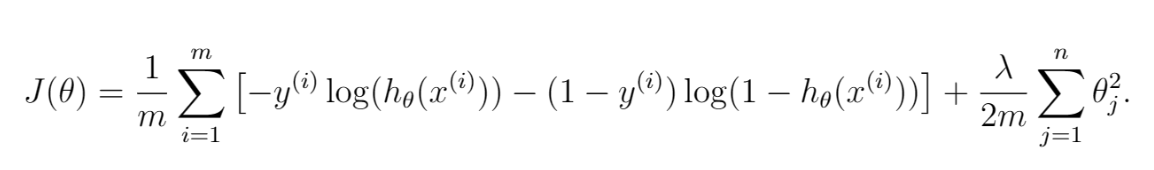

In [58]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2)) #theta_0不进行惩罚
    return np.sum(first - second) / len(X) + reg

## 3. gradient descent
请注意等式中的"reg" 项。还注意到另外的一个“学习率”参数。这是一种超参数，用来控制正则化项。现在我们需要添加正则化梯度函数：

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对theta进行正则化，所以梯度下降算法将分两种情形：
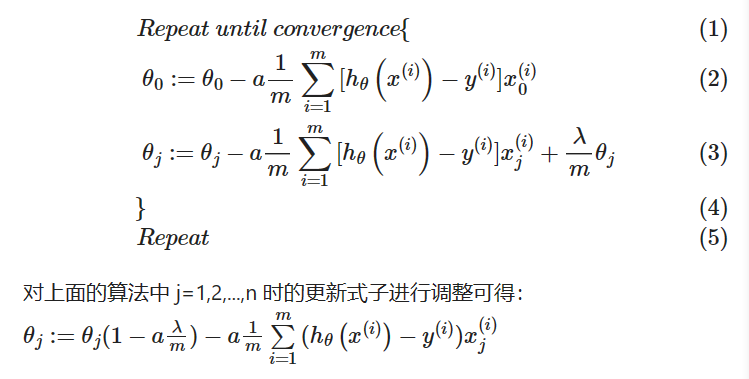

In [59]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X) #theta_0不进行惩罚 
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

## 4. initialized variables

In [60]:
# set X and y (remember from above that we moved the label to column 0)
cols = ex2data2.shape[1]
X_2 = ex2data2.iloc[:,1:cols] # [,)左到右不到
y_2 = ex2data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X_2 = np.array(X_2.values)
y_2 = np.array(y_2.values)
theta_2 = np.zeros(11) #feature mapping dimension

## 5.用SciPy's truncated newton（TNC）实现寻找最优参数+Penalty level of regularity

In [62]:
learningRate = 1
costReg(theta_2, X_2, y_2, learningRate)

0.6931471805599454

In [63]:
gradientReg(theta_2, X_2, y_2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [64]:
#用SciPy's truncated newton（TNC）实现寻找最优参数
# https://www.cnblogs.com/tongtong123/p/10634716.html
import scipy.optimize as opt
result = opt.fmin_tnc(func=costReg, x0=theta_2, fprime=gradientReg, args=(X_2, y_2,learningRate))
result

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

## 6.Accuracy

In [74]:
theta_min = np.matrix(result[0]).T # 注意矩阵计算
predictions = predict(theta_min, X_2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_2)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 0.6610169491525424%


## 7.我们还可以使用高级Python库像scikit-learn来解决这个问题

In [76]:
from sklearn import linear_model #调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X_2, y_2.ravel())

LogisticRegression()

In [77]:
model.score(X_2, y_2)

0.6610169491525424